# Árboles de Decisión para Marketing Bancario

En este capítulo, exploraremos el uso de árboles de decisión en el contexto del marketing bancario, utilizando el dataset disponible en el repositorio de UCI. Los árboles de decisión son herramientas poderosas para la clasificación y regresión, y son especialmente útiles por su facilidad de interpretación.

## Obtención de los Datos

Primero, cargaremos el dataset de marketing bancario, como se mostró previamente:


In [1]:
import pandas as pd

df_bank=pd.read_csv('bank_marketing.csv')

df_bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,HasTermDeposit
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



## Análisis Exploratorio de Datos (EDA)

Antes de proceder con la construcción de modelos, realizaremos un análisis exploratorio de los datos para comprender mejor las características y la distribución de los mismos.

```markdown
El EDA nos ayudará a identificar las variables más significativas y a entender la relación entre ellas y la variable objetivo. Esto es crucial para determinar cómo preprocesar los datos y qué variables incluir en el modelo de árbol de decisión.
```




## Preprocesamiento de Datos

El preprocesamiento incluirá la limpieza de datos, el manejo de valores faltantes, la codificación de variables categóricas y la normalización de variables numéricas, si es necesario.

```markdown
Es importante preprocesar adecuadamente los datos para maximizar la efectividad del modelo de árbol de decisión. Esto incluye convertir variables categóricas a un formato que el modelo pueda interpretar y asegurar que todas las variables estén en una escala comparable.
```


Iniciamos con la descripción de las variables del dataset:

In [2]:
## Descripción de las variables, solammente categoricas

df_bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,HasTermDeposit
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


In [3]:
#Descripcion variables numericas
df_bank.describe(include='number')

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Exploremos las variables con problemas, miremos las que tienen valores faltantes:


In [4]:
## Nulos

df_bank.isnull().sum()

age                   0
job                 288
marital               0
education          1857
default               0
balance               0
housing               0
loan                  0
contact           13020
day_of_week           0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          36959
HasTermDeposit        0
dtype: int64

la variable `poutcome` tiene bastantes valores faltantes, por lo que la eliminaremos del dataset. Además, convertiremos las variables categóricas en variables dummy para que el modelo de árbol de decisión pueda interpretarlas.

```{note}
La eliminación de la variable `poutcome` se realiza para simplificar el análisis. En un escenario real, se podrían explorar otras opciones para manejar los valores faltantes, como la imputación de valores o el uso de modelos más avanzados.
```


Ahora revisemos información sobre las variables, hagamos un análisi profundo para determinar cuales son realmente explicativas para la variable objetivo.


In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             44923 non-null  object
 2   marital         45211 non-null  object
 3   education       43354 non-null  object
 4   default         45211 non-null  object
 5   balance         45211 non-null  int64 
 6   housing         45211 non-null  object
 7   loan            45211 non-null  object
 8   contact         32191 non-null  object
 9   day_of_week     45211 non-null  int64 
 10  month           45211 non-null  object
 11  duration        45211 non-null  int64 
 12  campaign        45211 non-null  int64 
 13  pdays           45211 non-null  int64 
 14  previous        45211 non-null  int64 
 15  poutcome        8252 non-null   object
 16  HasTermDeposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Variables utiles para la entrada

Cuando trabajamos con modelos de aprendizaje automático, especialmente árboles de decisión, es crucial elegir cuidadosamente las variables (características) que incluiremos en nuestro modelo. Esta elección se basa en la relevancia de las variables para la predicción, así como en consideraciones prácticas como la cantidad de valores faltantes y la naturaleza de los datos. Vamos a analizar las variables del dataset de marketing bancario y discutir cuáles podrían ser interesantes para el modelo y cuáles podríamos considerar quitar.

### Variables Interesantes para el Modelo

1. **age**: La edad del cliente puede influir en su decisión de suscribirse a un depósito a plazo.
2. **job**: La profesión podría tener una correlación con la propensión a suscribirse a un depósito a plazo.
3. **marital**: El estado civil podría influir en las decisiones financieras.
4. **education**: El nivel de educación podría correlacionarse con la decisión de suscribirse a un depósito a plazo.
5. **default**: Saber si el cliente tiene créditos en mora podría ser relevante para la decisión de marketing.
6. **balance**: El saldo de la cuenta podría indicar la solvencia económica del cliente y su propensión a invertir.
7. **housing**: Tener una hipoteca podría influir en la disponibilidad de fondos para invertir en un depósito a plazo.
8. **loan**: Similar a "housing", tener préstamos personales podría afectar la capacidad de suscribirse a un depósito a plazo.
9. **contact**: El método de contacto podría influir en la efectividad de la campaña.
10. **day_of_month**, **month**: La fecha de último contacto puede tener efectos estacionales en la decisión del cliente.
11. **duration**: La duración de la última llamada puede ser un indicador del interés del cliente.
12. **campaign**: La cantidad de contactos durante la campaña puede afectar la decisión del cliente.
13. **pdays**, **previous**, **poutcome**: Estas relacionadas con campañas anteriores pueden ofrecer insights sobre la receptividad del cliente.

### Variables a Considerar Quitar

1. **poutcome**: Aunque es interesante, tiene una gran cantidad de valores faltantes (solo 8252 no nulos de 45211), lo que podría dificultar su uso directo sin un manejo adecuado de los valores faltantes.
2. **contact**: Si bien el método de contacto podría ser relevante, la gran cantidad de valores faltantes (32191 no nulos de 45211) también puede limitar su utilidad a menos que se apliquen técnicas de imputación.

### Consideraciones Adicionales

- **Tratamiento de valores faltantes**: Es importante decidir cómo manejar las variables con valores faltantes. En algunos casos, como `poutcome` y `contact`, podríamos optar por excluir la variable, imputar los valores faltantes, o incluso transformarla en una variable binaria que indique la presencia o ausencia de información.
- **Codificación de variables categóricas**: Variables como `job`, `marital`, `education`, `default`, `housing`, `loan`, y `month` son categóricas y necesitarán ser transformadas a un formato numérico a través de técnicas como la codificación One-Hot antes de ser utilizadas en el modelo.

La selección final de variables debería basarse en un análisis más detallado, incluyendo la importancia de las características y cómo afectan al rendimiento del modelo. Una técnica útil para esto podría ser el análisis de importancia de variables que ofrecen muchos modelos de árboles de decisión, lo que nos permite evaluar qué tan importantes son las distintas características para las predicciones del modelo.

### Variable objetivo

La variable objetivo 'HasTermDeposit' indica si un cliente se suscribió a un depósito a plazo o no. Esta es la variable que queremos predecir con nuestro modelo de árbol de decisión. Esta con yes o no, por lo que la convertiremos a 1 o 0 para que el modelo pueda interpretarla.

```{note}
La conversión de la variable objetivo a 1 y 0 es necesaria para que el modelo de árbol de decisión pueda interpretarla. En general, es importante asegurarse de que la variable objetivo esté en un formato que el modelo pueda entender.
```

In [6]:
df_bank['HasTermDeposit'] .value_counts()

HasTermDeposit
no     39922
yes     5289
Name: count, dtype: int64

In [7]:
import pandas as pd
import numpy as np


# Para 'poutcome' y 'contact', consideraremos eliminar estas columnas debido a la alta cantidad de valores faltantes
df_bank.drop(columns=['poutcome', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous' ], inplace=True)
# Si la variable objetivo 'HasTermDeposit' es categórica ('yes', 'no'), la convertimos a numérica
df_bank['HasTermDeposit'] = df_bank['HasTermDeposit'].map({'yes': 1, 'no': 0})

df_bank.head()



,age,job,marital,education,default,balance,housing,loan,HasTermDeposit
0,58,management,married,tertiary,no,2143,yes,no,0
1,44,technician,single,secondary,no,29,yes,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,0
3,47,blue-collar,married,NaN,no,1506,yes,no,0
4,33,NaN,single,NaN,no,1,no,no,0



## Cómo Funcionan los Árboles de Decisión

Los árboles de decisión son una metodología de aprendizaje automático supervisado utilizada tanto para clasificación como para regresión, valorada por su claridad y facilidad de interpretación. A continuación, exploraremos los principios fundamentales detrás de los árboles de decisión y cómo pueden aplicarse en análisis predictivos.

### Conceptos Básicos

```{note}
Un árbol de decisión representa un modelo de predicciones en forma de estructura de árbol, donde cada nodo interno simboliza una "pregunta" sobre una característica, cada rama la decisión tomada y cada hoja el resultado o predicción final.
```

#### División de los Datos

La construcción de un árbol inicia en la raíz y se divide basándose en la selección de características que resulten en los subconjuntos más puros posibles.

```{tip}
La "pureza" de un nodo se refiere a qué tan homogéneas son las muestras dentro de ese nodo respecto a la variable objetivo. Un nodo es completamente puro cuando todas sus muestras pertenecen a la misma categoría.
```

#### Criterios de División

Dos criterios predominantes para la división son la Ganancia de Información y el Índice Gini.

```{example}
- **Ganancia de Información**: Mide la reducción en entropía(La dispersión entre los datos) o incertidumbre.
- **Índice Gini**: Evalúa la frecuencia con la que un elemento aleatorio sería identificado incorrectamente.
```

#### Poda del Árbol

Limitar la complejidad del árbol es crucial para prevenir el sobreajuste, manteniendo el modelo generalizable a nuevos datos.

```{warning}
El sobreajuste ocurre cuando un modelo aprende patrones del ruido en los datos de entrenamiento, afectando negativamente su rendimiento en datos no vistos.
```

### Ventajas y Desventajas

```{note}
Los árboles de decisión son intuitivos y pueden manejar datos categóricos y numéricos. Sin embargo, son propensos al sobreajuste y pueden ser sensibles a pequeñas variaciones en los datos de entrenamiento.
```

### Aplicaciones Prácticas

En el marketing bancario, los árboles de decisión pueden ayudar a identificar perfiles de clientes propensos a adquirir un producto o a abandonar un servicio.

#### Ejemplo de Implementación en Python

A continuación, un breve ejemplo de cómo implementar un árbol de decisión utilizando scikit-learn en Python.

```python
# Importando las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos y entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred):.2f}")
```

#### Visualización del Árbol

Visualizar el árbol de decisión nos permite interpretar cómo el modelo toma sus decisiones.

```python
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, proportion=True)
plt.show()
```

```{tip}
La visualización de un árbol de decisión facilita la comprensión de las decisiones del modelo y es una herramienta poderosa para explicar los resultados a partes interesadas no técnicas.
```

Con estos elementos, los árboles de decisión se presentan como una herramienta versátil y comprensible para el análisis predictivo en diversas aplicaciones, incluido el marketing bancario. Su capacidad para desglosar decisiones complejas en una serie de preguntas y respuestas simples los hace especialmente atractivos para la toma de decisiones basada en datos.

In [9]:
df_bank.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'HasTermDeposit'],
      dtype='object')

In [10]:
columna_entrada = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan'] 

columna_salida = ['HasTermDeposit']

In [15]:
X = df_bank[columna_entrada]
X
X.select_dtypes(include="object") 

,job,marital,education,default,housing,loan
0,management,married,tertiary,no,yes,no
1,technician,single,secondary,no,yes,no
2,entrepreneur,married,secondary,no,yes,yes
3,blue-collar,married,NaN,no,yes,no
4,NaN,single,NaN,no,no,no
...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no
45207,retired,divorced,primary,no,no,no
45208,retired,married,secondary,no,no,no
45209,blue-collar,married,secondary,no,no,no


In [20]:
X_trans_object = pd.get_dummies(X.select_dtypes(include="object"))
X_trans_object

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,...,True,False,True,False,True,False,False,True,True,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,True,False,True,False,True,False
45207,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
45208,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
45209,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False


In [25]:
#Excluyo las variables objeto, dejandolo en una sola tabla (axis 1 pega columna - columna)
X = pd.concat([X.select_dtypes(exclude="object"), X_trans_object], axis= 1)
X

,age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,False,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,True,True,False
1,44,29,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,True,False
2,33,2,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,True
3,47,1506,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
4,33,1,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,True,False
45207,71,1729,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
45208,72,5715,False,False,False,False,False,True,False,False,...,False,False,True,False,True,False,True,False,True,False
45209,57,668,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False


In [26]:
y = df_bank[columna_salida]
y

,HasTermDeposit
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [27]:
# Importando las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos y entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred):.2f}")

Exactitud del modelo: 0.88


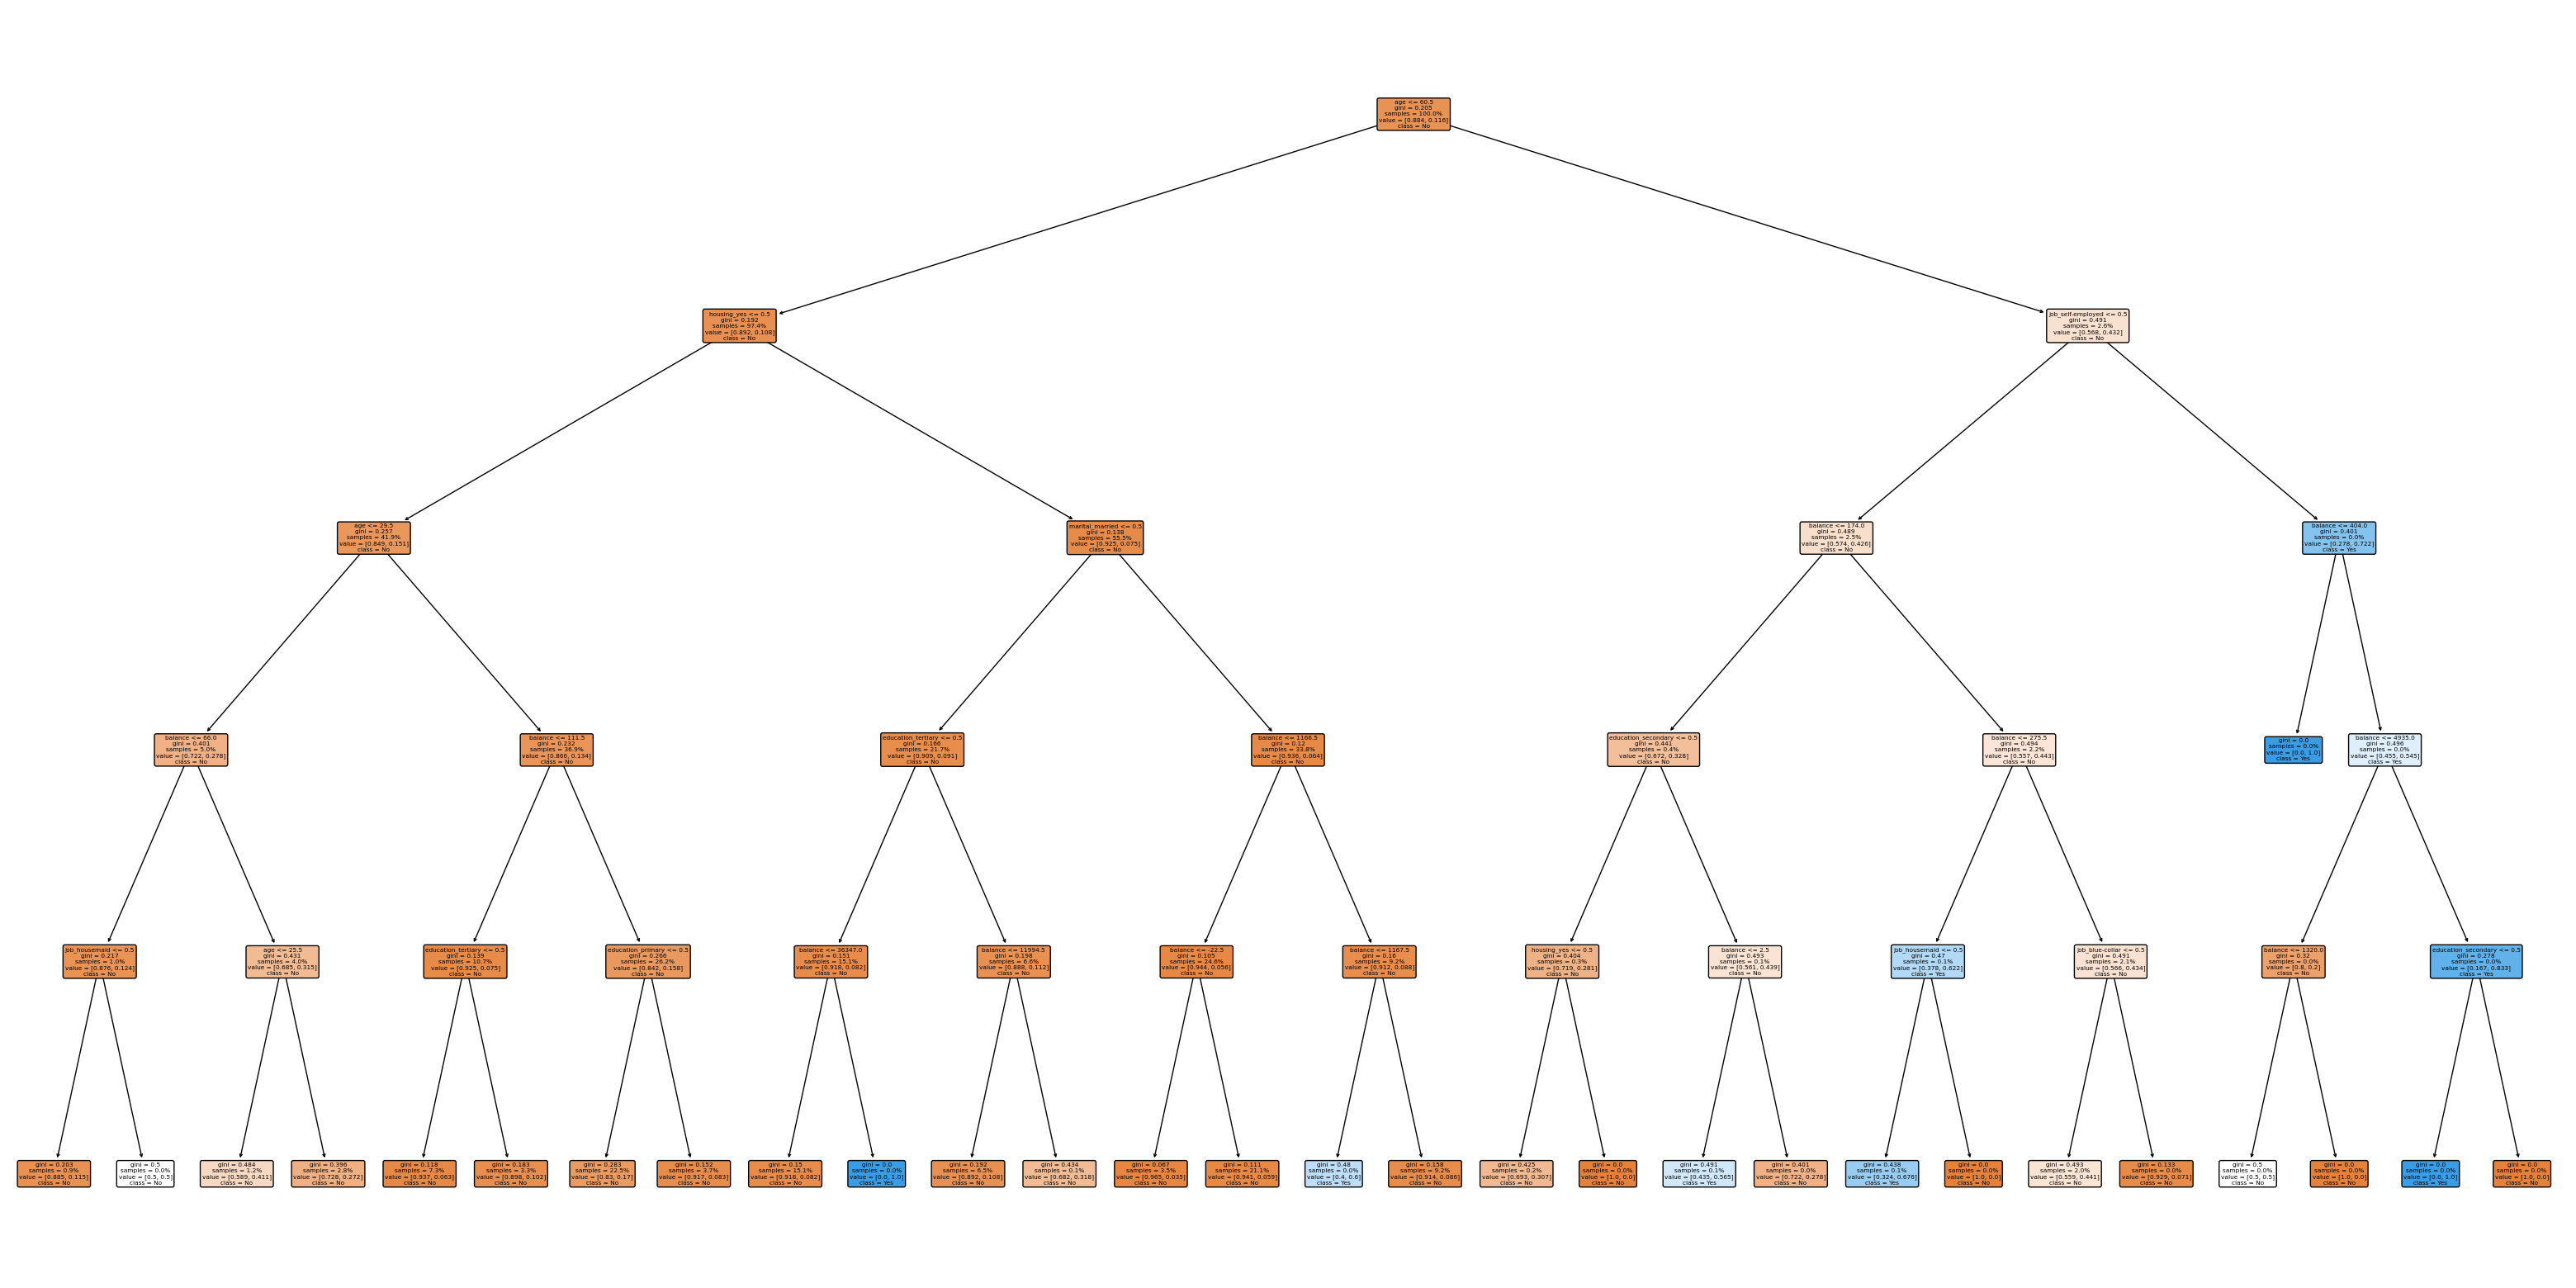

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, proportion=True)
plt.savefig("mi primer arbol.png")